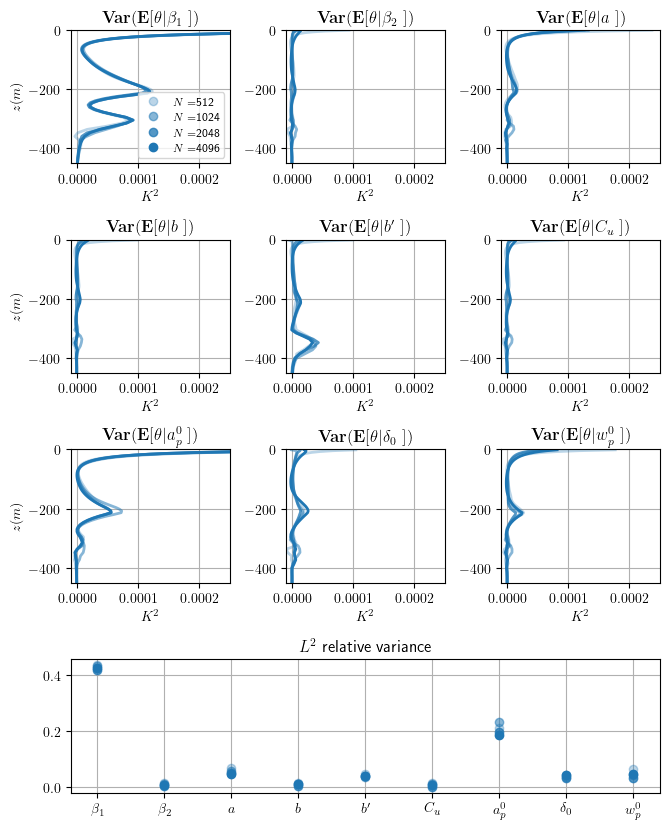

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import pickle

plt.rcParams['text.usetex'] = True
# plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'figure.facecolor': 'white'})
plt.rcParams.update({'savefig.facecolor': 'white'})
plt.rcParams.update({'lines.linewidth': 2.0})
# plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

nsamples = ['512','1024','2048','4096']
# nsamples = ['10', '20','30']
# nsamples = ['512', '1024','2048']
# nsamples=['30','32','64','128','256','512']

cases=['FC500','W005_C500_NO_COR']
case = cases[0] 

output={}
for nsample in nsamples:
    with open('outputs/sobol_FC500_'+nsample, 'rb') as handle:
    # with open('outputs/sobol_'+nsample, 'rb') as handle:
        output[nsample] = pickle.load(handle)

saving_path = 'figures/sensitivity_of_variance_'+case+'.png'

true_name={'Cent': r'$\beta_1$',
            'Cdet': r'$\beta_2$',
            'wp_a': r'$a$',
            'wp_b': r'$b$',
            'wp_bp': r'$b^\prime$',
            'up_c': r'$C_u$',
            'vp_c': r'$C_v$',
            'bc_ap': r'$a_p^0$',
            'delta_bkg': r'$\delta_0$',
            'wp0': r'$w_p^0$' }

#=============== Plot only THETA =====================

alphas = np.linspace(start=0.3,stop=1,num=len(nsamples))
colors=['tab:blue']*len(nsamples)
# fig, axs = plt.subplots(nrows=3, ncols=4, sharex=False, constrained_layout=True)

fig=plt.figure(figsize=(6.8,8.4))
# ax11 = plt.subplot(3,4,1)
# ax12 = plt.subplot(3,4,2)
# ax13 = plt.subplot(3,4,3)
# ax14 = plt.subplot(3,4,4)
# ax21 = plt.subplot(3,4,5)
# ax22 = plt.subplot(3,4,6)
# ax23 = plt.subplot(3,4,7)
# ax24 = plt.subplot(3,4,8)
# ax31 = plt.subplot(3,4,9)
# # ax32 = plt.subplot(3,4,10)
# ax5  = plt.subplot(3,1,3)
# # axs=[ax11,ax12,ax13,ax14,ax21,ax22,ax23,ax24,ax31,ax32,ax5]
# axs=[ax11,ax12,ax13,ax14,ax21,ax22,ax23,ax24,ax31,ax5]
axs = []
for i in range(1,10):
    axs.append(plt.subplot(4,3,i))
axs.append(plt.subplot(4,1,4))

field = 'temp' 
# xmin = -0.2
# xmax = 1
xmin = -1e-5
xmax = 2.5e-4
zlim = -450
#====================================
for k,nsample in enumerate(nsamples):
    z_r = output[nsample][case]['z_r']
    for i, parameter in enumerate(output[nsample][case]['sobol_indices']):
        variable_name = true_name[parameter]
        axs[i].plot(output[nsample][case]['sobol_indices'][parameter][field]['enumerator_z'], z_r, color=colors[k],alpha=alphas[k])
        # axs[i].plot(output[nsample][case]['sobol_indices'][parameter][field]['z index'], z_r, 
        #             color=colors[k],
        #             alpha=alphas[k])

        # axs[i].set_ylabel(r'$z(m)$')
        axs[i].set_xlabel(r'$K^2$')
        axs[i].set_title(r'$\mathbf{Var}(\mathbf{E}[\theta |$'+variable_name+' $])$')
        axs[i].set_xlim((xmin,xmax))
        axs[i].set_ylim((zlim,0))

axs[0].set_ylabel(r'$z(m)$')
axs[3].set_ylabel(r'$z(m)$')
axs[6].set_ylabel(r'$z(m)$')

ax=axs[-1]
for k,nsample in enumerate(nsamples):
    for parameter in output[nsample][case]['sobol_indices']:
        variable_name = true_name[parameter]
        L2sobolindex=output[nsample][case]['sobol_indices'][parameter][field]['l2 index']
        ax.plot(variable_name, L2sobolindex, 'o', 
        color=colors[k],  alpha=alphas[k], label=r'$N=$'+nsample)
    ax.set_title(r'$L^2$ Sobol index')
    # ax.set_yscale('log')

    # ax.set_ylim((0,0.5))

for ax in axs: ax.grid()

nvar=len(output[nsample][case]['sobol_indices'])
handles1, labels1 = ax.get_legend_handles_labels()
handles,labels = [], []
for k in range(len(nsamples)):
    handles.append(handles1[k*nvar])
    labels.append(labels1[k*nvar])
axs[0].legend(handles,labels, fontsize=8 )
fig.tight_layout()






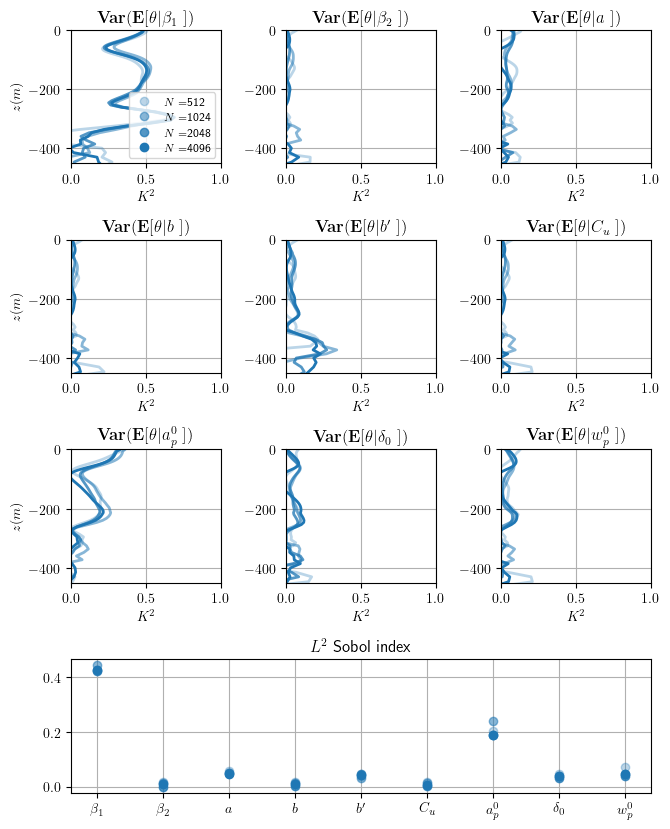

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import pickle

plt.rcParams['text.usetex'] = True
# plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'figure.facecolor': 'white'})
plt.rcParams.update({'savefig.facecolor': 'white'})
plt.rcParams.update({'lines.linewidth': 2.0})
# plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

nsamples = ['512','1024','2048','4096']
# nsamples = ['10', '20','30']
# nsamples = ['512', '1024','2048']
# nsamples=['30','32','64','128','256','512']

cases=['FC500','W005_C500_NO_COR']
case = cases[0] 

output={}
for nsample in nsamples:
    with open('outputs/sobol_FC500_'+nsample, 'rb') as handle:
    # with open('outputs/sobol_'+nsample, 'rb') as handle:
        output[nsample] = pickle.load(handle)

saving_path = 'figures/sensitivity_of_variance_'+case+'.png'

true_name={'Cent': r'$\beta_1$',
            'Cdet': r'$\beta_2$',
            'wp_a': r'$a$',
            'wp_b': r'$b$',
            'wp_bp': r'$b^\prime$',
            'up_c': r'$C_u$',
            'vp_c': r'$C_v$',
            'bc_ap': r'$a_p^0$',
            'delta_bkg': r'$\delta_0$',
            'wp0': r'$w_p^0$' }

#=============== Plot only THETA =====================

alphas = np.linspace(start=0.3,stop=1,num=len(nsamples))
colors=['tab:blue']*len(nsamples)
# fig, axs = plt.subplots(nrows=3, ncols=4, sharex=False, constrained_layout=True)

fig=plt.figure(figsize=(6.8,8.4))
# ax11 = plt.subplot(3,4,1)
# ax12 = plt.subplot(3,4,2)
# ax13 = plt.subplot(3,4,3)
# ax14 = plt.subplot(3,4,4)
# ax21 = plt.subplot(3,4,5)
# ax22 = plt.subplot(3,4,6)
# ax23 = plt.subplot(3,4,7)
# ax24 = plt.subplot(3,4,8)
# ax31 = plt.subplot(3,4,9)
# # ax32 = plt.subplot(3,4,10)
# ax5  = plt.subplot(3,1,3)
# # axs=[ax11,ax12,ax13,ax14,ax21,ax22,ax23,ax24,ax31,ax32,ax5]
# axs=[ax11,ax12,ax13,ax14,ax21,ax22,ax23,ax24,ax31,ax5]
axs = []
for i in range(1,10):
    axs.append(plt.subplot(4,3,i))
axs.append(plt.subplot(4,1,4))

field = 'temp' 
# xmin = -0.2
# xmax = 1
xmin = -1e-5
xmax = 1
zlim = -450
#====================================
for k,nsample in enumerate(nsamples):
    z_r = output[nsample][case]['z_r']
    for i, parameter in enumerate(output[nsample][case]['sobol_indices']):
        variable_name = true_name[parameter]
        axs[i].plot(output[nsample][case]['sobol_indices'][parameter][field]['total z index'], z_r, color=colors[k],alpha=alphas[k])
        # axs[i].plot(output[nsample][case]['sobol_indices'][parameter][field]['z index'], z_r, 
        #             color=colors[k],
        #             alpha=alphas[k])

        # axs[i].set_ylabel(r'$z(m)$')
        axs[i].set_xlabel(r'$K^2$')
        axs[i].set_title(r'$\mathbf{Var}(\mathbf{E}[\theta |$'+variable_name+' $])$')
        axs[i].set_xlim((xmin,xmax))
        axs[i].set_ylim((zlim,0))

axs[0].set_ylabel(r'$z(m)$')
axs[3].set_ylabel(r'$z(m)$')
axs[6].set_ylabel(r'$z(m)$')

ax=axs[-1]
for k,nsample in enumerate(nsamples):
    for parameter in output[nsample][case]['sobol_indices']:
        variable_name = true_name[parameter]
        L2sobolindex=output[nsample][case]['sobol_indices'][parameter][field]['total l2 index']
        ax.plot(variable_name, L2sobolindex, 'o', 
        color=colors[k],  alpha=alphas[k], label=r'$N=$'+nsample)
    ax.set_title(r'$L^2$ Sobol index')
    # ax.set_yscale('log')

    # ax.set_ylim((0,0.5))

for ax in axs: ax.grid()

nvar=len(output[nsample][case]['sobol_indices'])
handles1, labels1 = ax.get_legend_handles_labels()
handles,labels = [], []
for k in range(len(nsamples)):
    handles.append(handles1[k*nvar])
    labels.append(labels1[k*nvar])
axs[0].legend(handles,labels, fontsize=8 )
fig.tight_layout()




